In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
titanic_db = acquire.get_titanic_data()
titanic_db

In [ ]:
titanic_db = titanic_db.drop(columns=['age', 'embarked', 'class', 'deck'])

In [ ]:
dummy_titanic_db = pd.get_dummies(titanic_db[['sex', 'embark_town']], dummy_na=False, drop_first = [True, True])
dummy_titanic_db

In [ ]:
titanic_db = pd.concat([titanic_db, dummy_titanic_db], axis=1)
titanic_db

In [ ]:
def split_data(df, stratify_col):
    train_validate, test = train_test_split(df, test_size = .2, random_state=123, stratify=df[stratify_col])
    train, validate = train_test_split(train_validate, test_size=.25, random_state=123, stratify=train_validate[stratify_col])
    return train, validate, test

In [ ]:
titanic_train, titanic_validate, titanic_test = split_data(titanic_db, stratify_col = 'survived')
#truncated_titanic = titanic_train[numeric]

In [ ]:
titanic_train, titanic_validate, titanic_test = split_data(titanic_db, stratify_col = 'survived')
#truncated_titanic = titanic_train[numeric]
titanic_train = titanic_train.drop(['Unnamed: 0', 'passenger_id', 'sex', 'embark_town'], axis=1)
titanic_train

In [ ]:
sns.pairplot(titanic_train, hue='survived')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [25]:
X_train = titanic_train[titanic_train.columns[1:-2]]
y_train = titanic_train.survived
X_train


,pclass,sibsp,parch,fare,alone,sex_male
455,3,0,0,7.8958,1,1
380,1,0,0,227.5250,1,0
492,1,0,0,30.5000,1,1
55,1,0,0,35.5000,1,1
243,3,0,0,7.1250,1,1
...,...,...,...,...,...,...
695,2,0,0,13.5000,1,1
128,3,1,1,22.3583,0,0
636,3,0,0,7.9250,1,1
222,3,0,0,8.0500,1,1


In [147]:
knn5 = KNeighborsClassifier(n_neighbors=1, weights='distance', p=1)

In [148]:
knn5.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')

In [149]:
y_pred5 = knn5.predict(X_train)

In [150]:
y_pred5

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [151]:
y_pred_proba = knn5.predict_proba(X_train)

In [152]:
y_pred_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [153]:
knn5.classes_

array([0, 1])

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay

In [155]:
confusion_matrix(y_train, y_pred5)

array([[288,  41],
       [ 19, 186]])

In [156]:
pd.crosstab(y_train, y_pred5)

col_0,0,1
survived,,
0,288,41
1,19,186


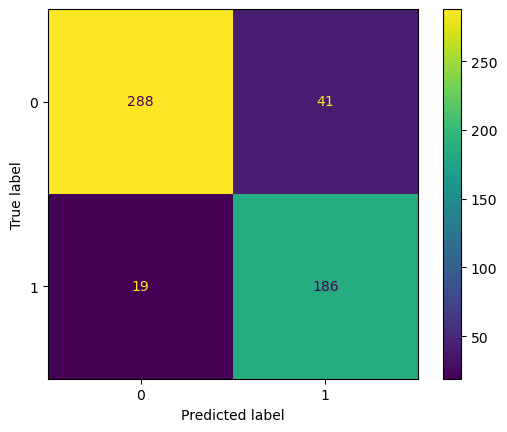

In [157]:
ConfusionMatrixDisplay.from_estimator(knn5, X_train, y_train)

In [144]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       329
           1       0.82      0.91      0.86       205

    accuracy                           0.89       534
   macro avg       0.88      0.89      0.88       534
weighted avg       0.89      0.89      0.89       534

